In [12]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

In [13]:
class BatsmanState(TypedDict):
    runs: int
    balls:int
    fours:int
    sixes:int
    # calculate 
    sr:float
    bpb :float
    boundry_percent :float
    summary :str

In [14]:
def calculate_sr(state:BatsmanState):
   sr = (state['runs']/state['balls'])/100
   state['sr'] =sr
 
   return state
    

In [15]:
def calculate_bpb(state:BatsmanState):
  bpb = state['balls']/(state['fours']+state['sixes'])
  
  state['bpb'] =bpb
  return state

In [16]:
def  calculate_boundry_percent(state:BatsmanState):
    boundary_percent =(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    
    state['boundary_percent'] = boundary_percent
    
    return state

In [17]:
def summary(state:BatsmanState):
    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundary- {state['bpb']}\n
    Boundary percent - {state['boundary_percent']}
    """

    state['summary'] = summary
    
    return state

In [8]:
def calculate_bpb(state:BatsmanState):
    bpb = state['balls']/(state['fours']+state['sixes'])
  
    state['bpb'] =bpb
    return state  

In [26]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundry_percent)
graph.add_node('summary', summary)

#edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')
graph.add_edge('summary', END)

workflow = graph.compile()

In [30]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundry_percent)
graph.add_node('summary', summary)

# Sequential edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge('calculate_sr', 'calculate_bpb')
graph.add_edge('calculate_bpb', 'calculate_boundary_percent')
graph.add_edge('calculate_boundary_percent', 'summary')
graph.add_edge('summary', END)

workflow = graph.compile()

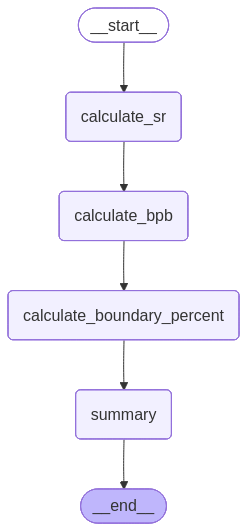

In [31]:
workflow

In [34]:
intial_state = {
    'runs' :100,
    'balls' : 60,
    'fours' : 8,
    'sixes' : 2
}

workflow.invoke(intial_state)

KeyError: 'boundary_percent'